# NBA Playoff EDA

---

**Author**: Preston Weaver

**Overview**:
This notebook explores underlying trends and patterns shared by NBA championship-winning teams from 2000 to 2024. The goal is to uncover which regular season statistics are most indicative of postseason success.

By analyzing key metrics such as Offensive Rating, Defensive Rating, Win Percentage, and others, we aim to identify features that are consistently present in teams that go on to win the championship. These insights will inform our modeling strategy and improve the accuracy of machine learning predictions in the next phase of the project.

Ultimately, the goal of this EDA is to highlight which variables are most likely to contribute to a team’s chances of becoming the next NBA champion.

## Setup

In [ ]:
install.packages('tidyverse')
install.packages('readr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
playoff_data <- read.csv('Regular_Season_Stats.csv')

## Categorical Stats Observations


### Championship Titles by Playoff Seed

This plot shows the distribution of NBA championship winners by playoff seed over the last 25 seasons (2000–2024). A few key patterns emerge:

- No team seeded lower than 3rd has won the NBA title during this time span, highlighting the importance of regular season performance for postseason success.

- 1 seeds are by far the most likely to win the championship, significantly outpacing all other seeds.

- This trend underscores the predictive value of seeding, suggesting that higher-seeded teams not only perform better in the regular season but also carry a meaningful advantage into the playoffs.

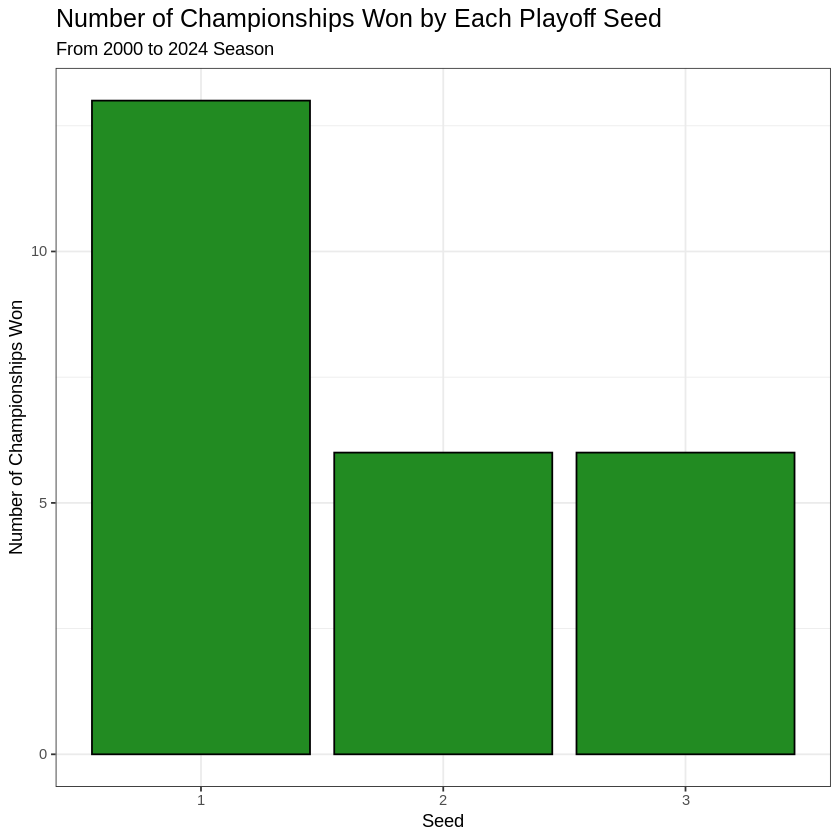

In [ ]:
# Look at which seeds have won the championship most often

playoff_data |>
  filter(Playoff == 1 & Champion == 1) |>
  mutate(Seed = as.factor(Seed)) |>
  group_by(Seed) |>
  summarise(championships_won = n()) |>
  ggplot(aes(Seed, championships_won)) +
    geom_col(fill = 'forestgreen', color = 'black') +
    labs(
      title = "Number of Championships Won by Each Playoff Seed",
      subtitle = "From 2000 to 2024 Season",
      y = "Number of Championships Won"
    ) +
    theme_bw() +
    theme(
      plot.title = element_text(size = 15)
    )

### Championships by Conference (2000–2024)
This plot shows the number of NBA championships won by each conference over the last 25 seasons. The Western Conference has claimed more titles than the Eastern Conference during this period, reflecting a period of dominance.

While conference affiliation is not expected to be a strong predictor in our modeling, because it doesn’t directly influence team strength, it remains an interesting trend.

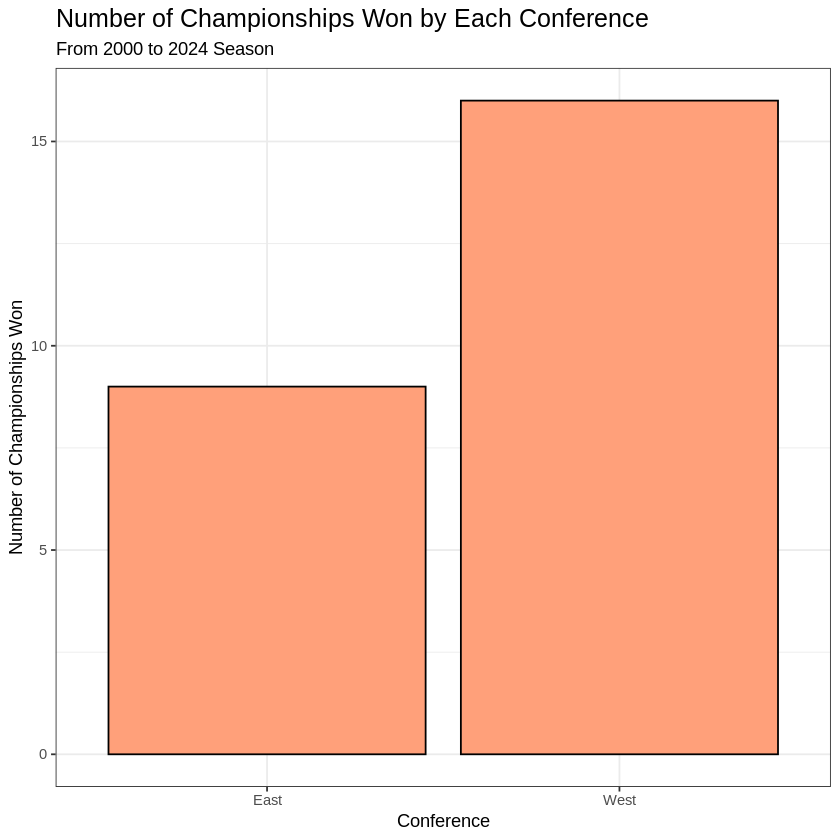

In [ ]:
playoff_data |>
  filter(Playoff == 1 & Champion == 1) |>
  mutate(Conference = as.factor(Conference)) |>
  group_by(Conference) |>
  summarise(championships_won = n()) |>
  ggplot(aes(Conference, championships_won)) +
    geom_col(fill = 'lightsalmon1', color = 'black') +
    labs(
      title = "Number of Championships Won by Each Conference",
      subtitle = "From 2000 to 2024 Season",
      y = "Number of Championships Won"
    ) +
    theme_bw() +
    theme(
      plot.title = element_text(size = 15)
    )

### Championship Teams and Top 10 Scorers

This plot illustrates the proportion of NBA championship teams from the past 25 seasons that featured at least one top 10 scorer (by points per game) during the regular season. The data reveals that 68% of title-winning teams had a top-tier scorer on their roster.

This trend suggests that while team success depends on many factors, having an elite offensive player is a common trait among championship teams and may serve as a valuable feature in modeling postseason outcomes.

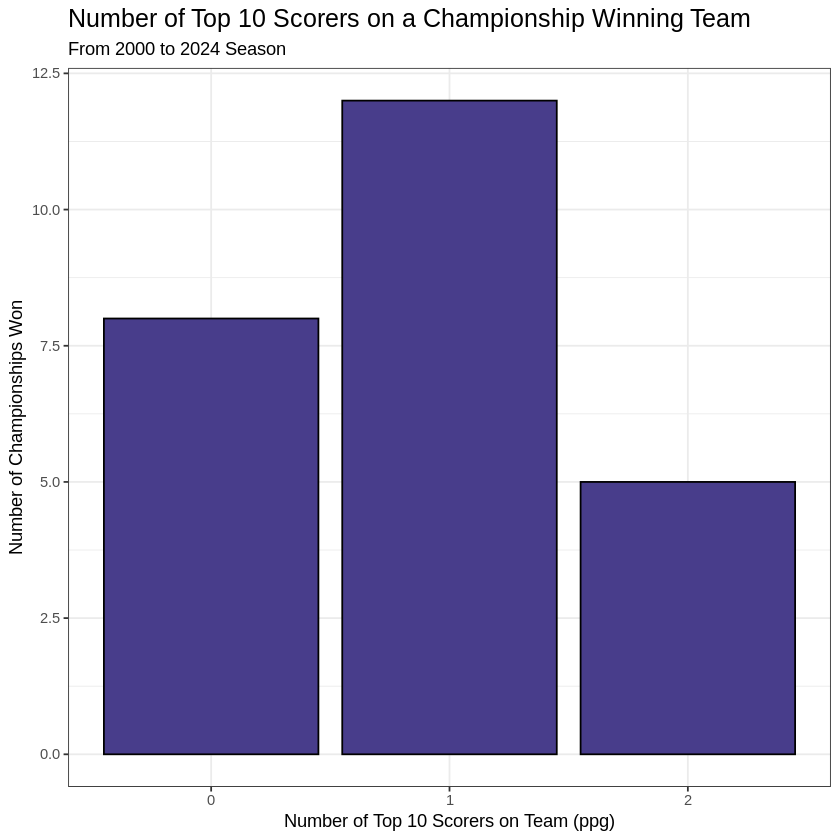

In [ ]:
playoff_data |>
  filter(Playoff == 1 & Champion == 1) |>
  mutate(Top10_Scorer = as.factor(Top10_Scorer)) |>
  group_by(Top10_Scorer) |>
  summarise(number_of_scorers = n()) |>
  ggplot(aes(Top10_Scorer, number_of_scorers)) +
    geom_col(fill = 'darkslateblue', color = 'black') +
    labs(
      title = "Number of Top 10 Scorers on a Championship Winning Team",
      subtitle = "From 2000 to 2024 Season",
      x = "Number of Top 10 Scorers on Team (ppg)",
      y = "Number of Championships Won"
    ) +
    theme_bw() +
    theme(plot.title = element_text(size = 15))

In [ ]:
playoff_data |>
  filter(Playoff == 1 & Champion == 1) |>
  mutate(Top10_Scorer = as.factor(Top10_Scorer)) |>
  group_by(Top10_Scorer) |>
  summarise(number_of_scorers = n())

Top10_Scorer,number_of_scorers
<fct>,<int>
0,8
1,12
2,5


### Championship Teams and Top 10 Rebounders

This plot examines how often NBA championship teams from the past 25 seasons included a top 10 rebounder (by rebounds per game) during the regular season. Unlike scoring, having a dominant rebounder does not appear to be a consistent trait among title-winning teams.

While rebounding remains an important part of the game, the data suggests it is not a defining factor for championship success, at least in terms of individual rebounding leaders.

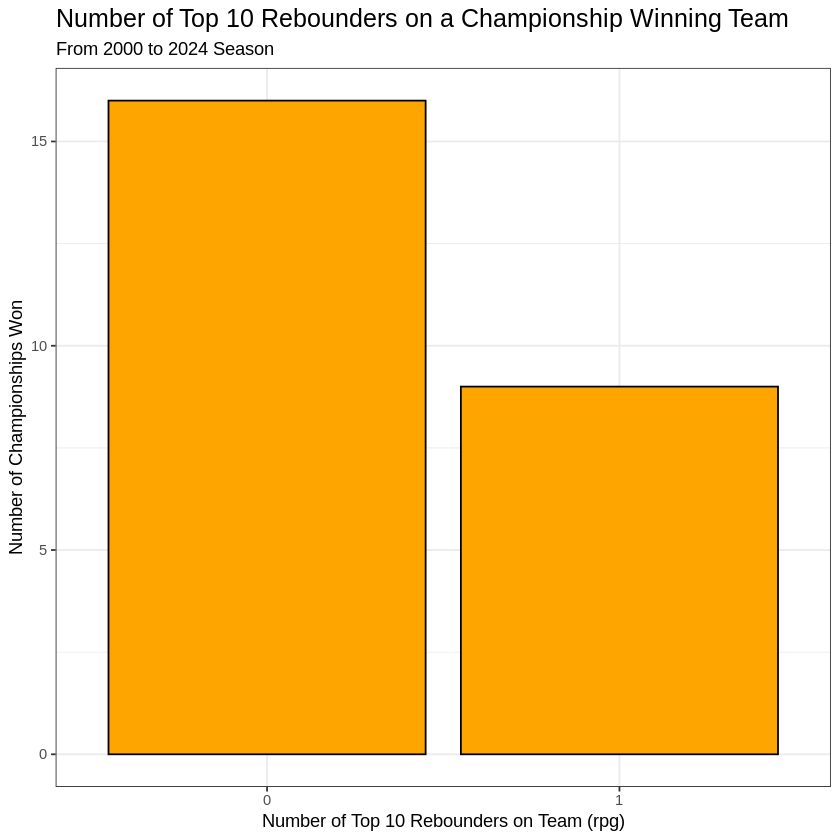

In [ ]:
playoff_data |>
  filter(Playoff == 1 & Champion == 1) |>
  mutate(Top10_Rebounder = as.factor(Top10_Rebounder)) |>
  group_by(Top10_Rebounder) |>
  summarise(number_of_rebounder = n()) |>
  ggplot(aes(Top10_Rebounder, number_of_rebounder)) +
    geom_col(fill = 'orange1', color = 'black') +
    labs(
      title = "Number of Top 10 Rebounders on a Championship Winning Team",
      subtitle = "From 2000 to 2024 Season",
      x = "Number of Top 10 Rebounders on Team (rpg)",
      y = "Number of Championships Won"
    ) +
    theme_bw() +
    theme(plot.title = element_text(size = 15))

## Numeric Predictor Observations

### Regular Season Win Percentage: Champions vs. Non-Champions

This density plot compares the regular season win percentage of NBA playoff teams, grouped by whether they won the championship or not. As expected, championship teams generally have higher win percentages, reflecting stronger regular season performance.

However, there is notable overlap between the two distributions. This suggests that while a high win percentage increases the likelihood of a championship, it is not a definitive predictor.

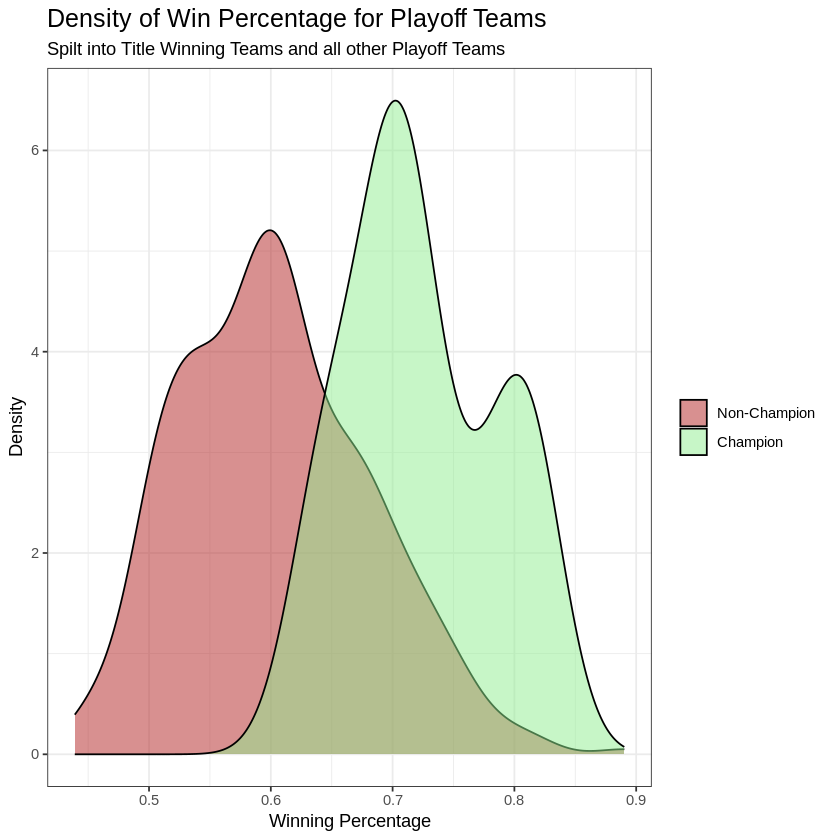

In [ ]:
playoff_data |>
  filter(Playoff == 1) |>
  mutate(Champion = as.factor(Champion)) |>
  ggplot(aes(win_percentage, fill = Champion)) +
    geom_density(alpha = 0.5) +
    labs(
      title = 'Density of Win Percentage for Playoff Teams',
      subtitle = 'Spilt into Title Winning Teams and all other Playoff Teams',
      x = 'Winning Percentage',
      y = "Density"
    ) +
    scale_fill_manual(values= c('0' = 'firebrick', '1' = 'palegreen2'),
                      labels = c('0' = 'Non-Champion', '1' = 'Champion')) +
    theme_bw() +
    theme(plot.title = element_text(size = 15),
          legend.title = element_blank())

### Margin of Victory (MOV): Champions vs. Non-Champions
This density plot compares the Margin of Victory (MOV) for NBA playoff teams, distinguishing between those that won the championship and those that did not. As with win percentage, championship teams tend to have a higher average MOV, reflecting their ability to consistently outperform opponents during the regular season.

Still, there is a substantial overlap between the two distributions. This indicates that while a strong MOV is a positive indicator of postseason potential, it alone does not guarantee championship success.

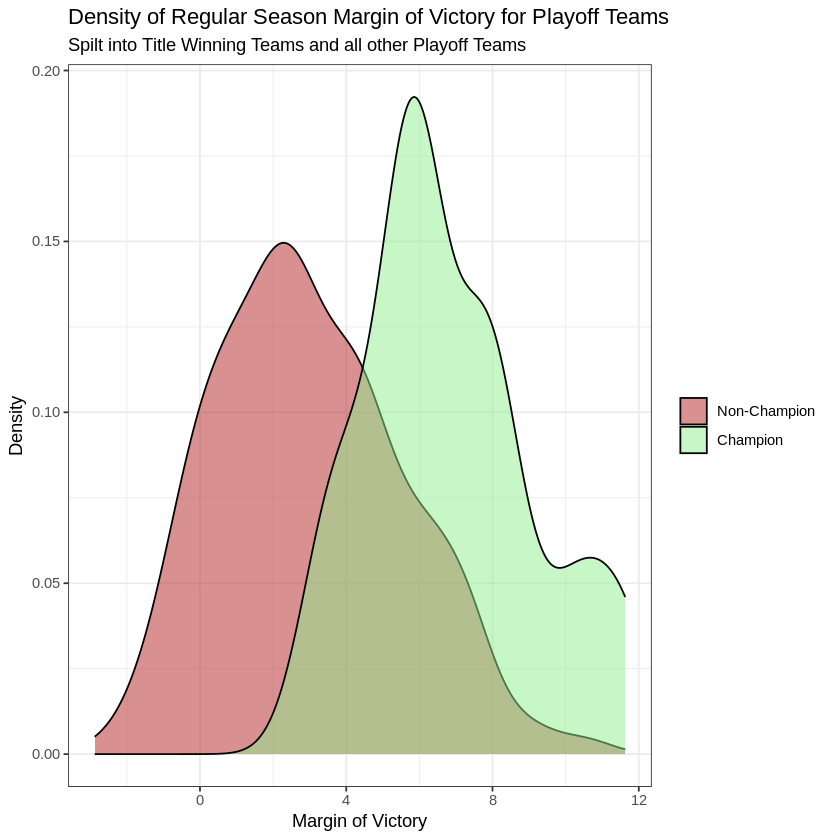

In [ ]:
playoff_data |>
  filter(Playoff == 1) |>
  mutate(Champion = as.factor(Champion)) |>
  ggplot(aes(MOV, fill = Champion)) +
    geom_density(alpha = 0.5) +
    labs(
      title = 'Density of Regular Season Margin of Victory for Playoff Teams',
      subtitle = 'Spilt into Title Winning Teams and all other Playoff Teams',
      x = 'Margin of Victory',
      y = "Density"
    ) +
    scale_fill_manual(values= c('0' = 'firebrick', '1' = 'palegreen2'),
                      labels = c('0' = 'Non-Champion', '1' = 'Champion')) +
    theme_bw() +
    theme(legend.title = element_blank(),
          theme(plot.title = element_text(size = 15)))

###  Offensive Rating vs. Defensive Rating (2000–2024)
This scatterplot displays NBA playoff teams’ Offensive Rating (ORtg) and Defensive Rating (DRtg) as differences from the league average for each season. Each point represents a team and is colored by whether it won the championship.

- The vertical dashed line marks the league-average offensive rating, teams to the right have an above average offense.

- The horizontal dashed line represents the league-average defensive rating — teams below the line allow fewer points per 100 possessions than average (lower DRtg is better).

The bottom-right quadrant, teams with both above-average offense and defense, contains the majority of champions over the past 25 seasons. In fact, no team with both below-average offense and defense relative to league average has won the title in this span, highlighting the importance of at least one elite side of the ball.

This visualization reinforces a consistent trend: championship-caliber teams typically excel in both offensive and defensive efficiency, and true title contention almost always involves being above average in at least one of these core metrics.


In [ ]:
Advanced_Stats_Season_Averages <- playoff_data |>
  filter(Playoff == 1) |>
  group_by(Season) |>
  summarize(League_Avg_ORtg = mean(ORtg),
            League_Avg_DRtg = mean(DRtg),
            .groups = 'drop')

Team_Stats_Comparison <- playoff_data |>
  filter(Playoff == 1) |>
  left_join(Advanced_Stats_Season_Averages, by = "Season") |>
  mutate(
    ORtg_diff_from_league_avg = ORtg - League_Avg_ORtg,  # Calculate ORtg difference
    DRtg_diff_from_league_avg = DRtg - League_Avg_DRtg   # Calculate DRtg difference
  )


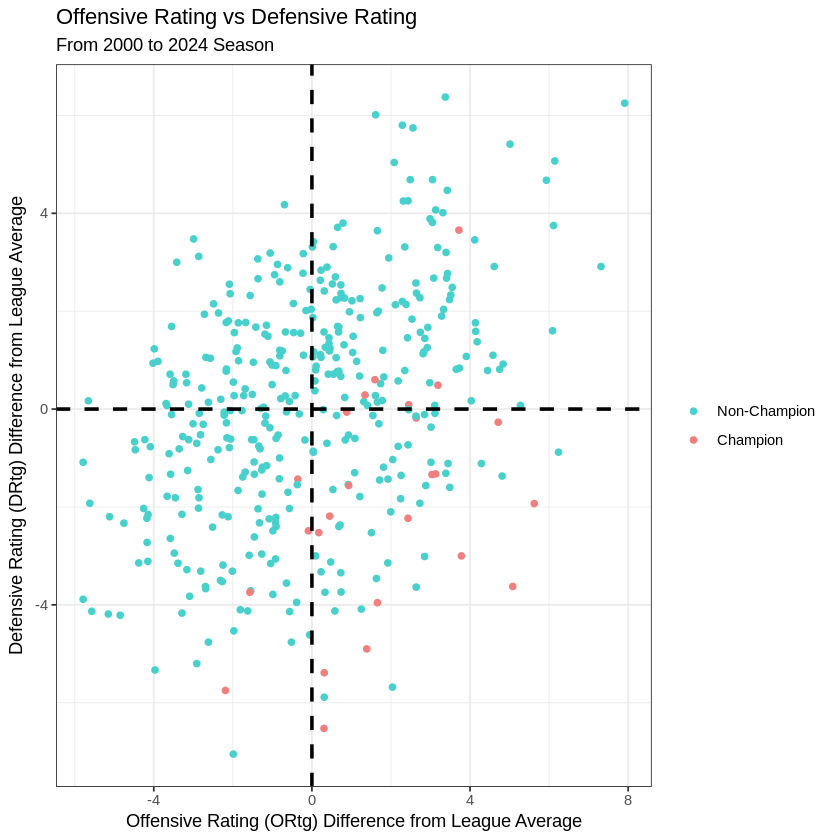

In [ ]:
# Scatter Plot of ORtg - League avg vs DRtg - League avg
Team_Stats_Comparison |>
  mutate(Champion = as.factor(Champion)) |>
  ggplot(aes(ORtg_diff_from_league_avg, DRtg_diff_from_league_avg, color = Champion,)) +
    geom_point() +
    geom_hline(yintercept = 0, linetype = 'dashed', linewidth = 1) +
    geom_vline(xintercept = 0, linetype = 'dashed', linewidth = 1) +
    labs(
      title = "Offensive Rating vs Defensive Rating",
      subtitle = "From 2000 to 2024 Season",
      x = "Offensive Rating (ORtg) Difference from League Average",
      y = "Defensive Rating (DRtg) Difference from League Average"
    ) +
    scale_color_manual(values= c('0' = 'mediumturquoise', '1' = 'lightcoral'),
                      labels = c('0' = 'Non-Champion', '1' = 'Champion')) +
    theme_bw() +
    theme(legend.title = element_blank(),
          theme(plot.title = element_text(size = 15)))



In [ ]:
Team_Stats_Comparison |>
  filter(Champion == 1) |>
  mutate(Above_Avg_Off_and_Def = case_when(
      ORtg_diff_from_league_avg > 0 & DRtg_diff_from_league_avg < 0 ~ 'Above Avg Off and Def',
      ORtg_diff_from_league_avg > 0 & DRtg_diff_from_league_avg > 0 ~ 'Above Avg Off and Below Avg Def',
      ORtg_diff_from_league_avg < 0 & DRtg_diff_from_league_avg < 0 ~ 'Below Avg Off and Above Avg Def',
      ORtg_diff_from_league_avg < 0 & DRtg_diff_from_league_avg > 0 ~ 'Below Avg Off and Def'
  )) |>
  group_by(Above_Avg_Off_and_Def) |>
  summarise(Count = n())

Above_Avg_Off_and_Def,Count
<chr>,<int>
Above Avg Off and Below Avg Def,5
Above Avg Off and Def,16
Below Avg Off and Above Avg Def,4


###  Effective Field Goal % vs. Defensive eFG% (2000–2024)
This scatterplot visualizes the relationship between a playoff team’s Effective Field Goal Percentage (eFG%) and Defensive eFG%, both expressed as differences from the league average in the same season. Each point represents a team and is colored according to whether they won the championship.

- The vertical dashed line marks the league-average offensive eFG% — teams to the right are more efficient shooters.

- The horizontal dashed line marks the league-average defensive eFG% — teams above the line allow opponents to shoot more efficiently, while those below suppress opponent shooting better than average.

The plot reveals that most championship teams cluster in the bottom-right quadrant, indicating they had above-average shooting efficiency and better-than-average defense against opponent shooting.

Notably, no champions appear in the top-left quadrant (below-average eFG and above-average opponent eFG), reinforcing the idea that winning a title usually requires elite shooting performance on at least one end of the floor—ideally both.

This visualization underscores the importance of two-way efficiency as a key differentiator between champions and non-champions.

In [ ]:
Advanced_Stats_Season_Averages <- playoff_data |>
  filter(Playoff == 1) |>
  group_by(Season) |>
  summarize(League_Avg_ORtg = mean(ORtg),
            League_Avg_DRtg = mean(DRtg),
            League_Avg_eFG = mean(eFG_percent),
            League_Avg_Def_eFG = mean(Def_eFG_percent),
            .groups = 'drop')

Team_Stats_Comparison <- playoff_data |>
  filter(Playoff == 1) |>
  left_join(Advanced_Stats_Season_Averages, by = "Season") |>
  mutate(
    ORtg_diff_from_league_avg = ORtg - League_Avg_ORtg,  # Calculate ORtg difference
    DRtg_diff_from_league_avg = DRtg - League_Avg_DRtg,   # Calculate DRtg difference
    eFG_diff_from_league_avg = eFG_percent - League_Avg_eFG,
    Def_eFG_diff_from_league_avg = Def_eFG_percent - League_Avg_Def_eFG
  )


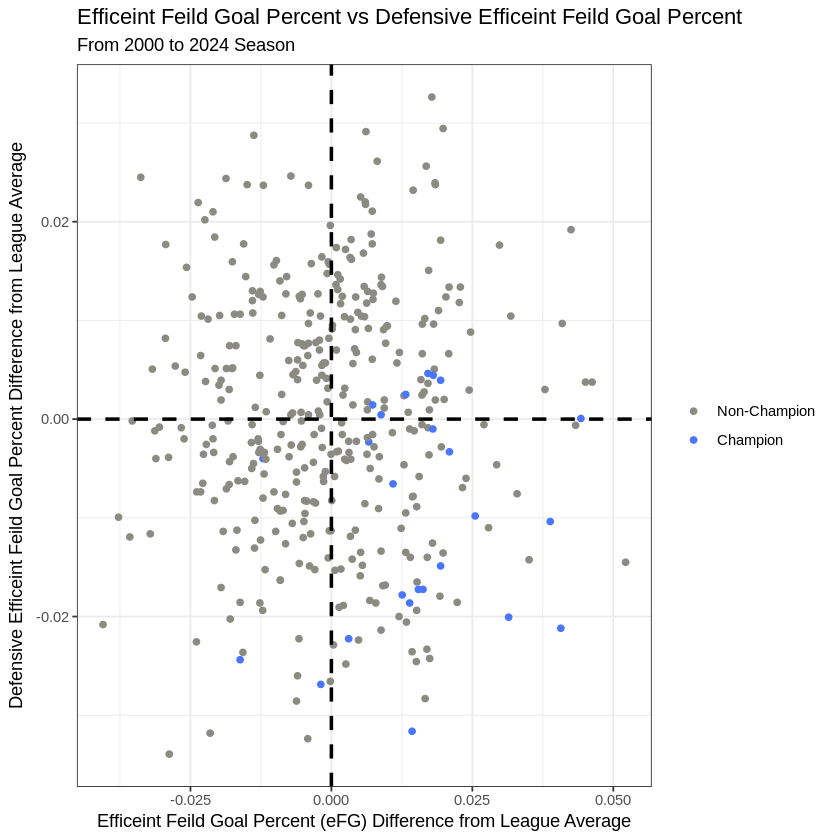

In [ ]:
Team_Stats_Comparison |>
  mutate(Champion = as.factor(Champion)) |>
  ggplot(aes(eFG_diff_from_league_avg, Def_eFG_diff_from_league_avg, color = Champion,)) +
    geom_point() +
    geom_hline(yintercept = 0, linetype = 'dashed', linewidth = 1) +
    geom_vline(xintercept = 0, linetype = 'dashed', linewidth = 1) +
    labs(
      title = "Efficient Field Goal Percent vs Defensive Efficient Field Goal Percent",
      subtitle = "From 2000 to 2024 Season",
      x = "Efficient Feild Goal Percent (eFG) Difference from League Average",
      y = "Defensive Efficient Field Goal Percent Difference from League Average"
    ) +
    scale_color_manual(values= c('0' = 'ivory4', '1' = 'royalblue1'),
                      labels = c('0' = 'Non-Champion', '1' = 'Champion')) +
    theme_bw() +
    theme(legend.title = element_blank(),
          theme(plot.title = element_text(size = 15)))


In [ ]:
Team_Stats_Comparison |>
  filter(Champion == 1) |>
  mutate(Above_Avg_eFG = case_when(
      eFG_diff_from_league_avg > 0 & Def_eFG_diff_from_league_avg < 0 ~ 'Above Avg eFG and Def eFG',
      eFG_diff_from_league_avg> 0 & Def_eFG_diff_from_league_avg > 0 ~ 'Above Avg eFG and Below Avg Def eFG',
      eFG_diff_from_league_avg < 0 & Def_eFG_diff_from_league_avg < 0 ~ 'Below Avg eFG and Above Avg Def eFG',
      eFG_diff_from_league_avg < 0 & Def_eFG_diff_from_league_avg > 0 ~ 'Below Avg eFG and Def eFG'
  )) |>
  group_by(Above_Avg_eFG) |>
  summarise(Count = n())

Above_Avg_eFG,Count
<chr>,<int>
Above Avg eFG and Below Avg Def eFG,7
Above Avg eFG and Def eFG,15
Below Avg eFG and Above Avg Def eFG,3


### Turnover Rate vs. Opponent Turnover Rate (2000–2024)
This scatterplot compares each playoff team’s Turnover Rate (TOV%) and Defensive Turnover Rate (opponent TOV%), measured as the difference from the league average in that season. Each point represents a team, colored by whether they won the championship or not.

- The vertical dashed line at zero indicates the league-average turnover rate, where teams to the left take better care of the ball.

- The horizontal dashed line represents the league-average opponent turnover rate, where teams above the line are more effective at forcing turnovers.

As we observe, no single trend readily emerges. It seems that turnover rate might not be a strong predictor.

In [ ]:
Advanced_Stats_Season_Averages <- playoff_data |>
  filter(Playoff == 1) |>
  group_by(Season) |>
  summarize(League_Avg_ORtg = mean(ORtg),
            League_Avg_DRtg = mean(DRtg),
            League_Avg_eFG = mean(eFG_percent),
            League_Avg_Def_eFG = mean(Def_eFG_percent),
            League_Avg_TOV_percent = mean(TOV_percent),
            League_Avg_Def_TOV_percent = mean(Def_TOV_percent),
            .groups = 'drop')

Team_Stats_Comparison <- playoff_data |>
  filter(Playoff == 1) |>
  left_join(Advanced_Stats_Season_Averages, by = "Season") |>
  mutate(
    ORtg_diff_from_league_avg = ORtg - League_Avg_ORtg,  # Calculate ORtg difference
    DRtg_diff_from_league_avg = DRtg - League_Avg_DRtg,   # Calculate DRtg difference
    eFG_diff_from_league_avg = eFG_percent - League_Avg_eFG,
    Def_eFG_diff_from_league_avg = Def_eFG_percent - League_Avg_Def_eFG,
    TOV_percent_diff_from_league_avg = TOV_percent - League_Avg_TOV_percent,
    Def_TOV_percent_diff_from_league_avg = Def_TOV_percent - League_Avg_Def_TOV_percent
  )

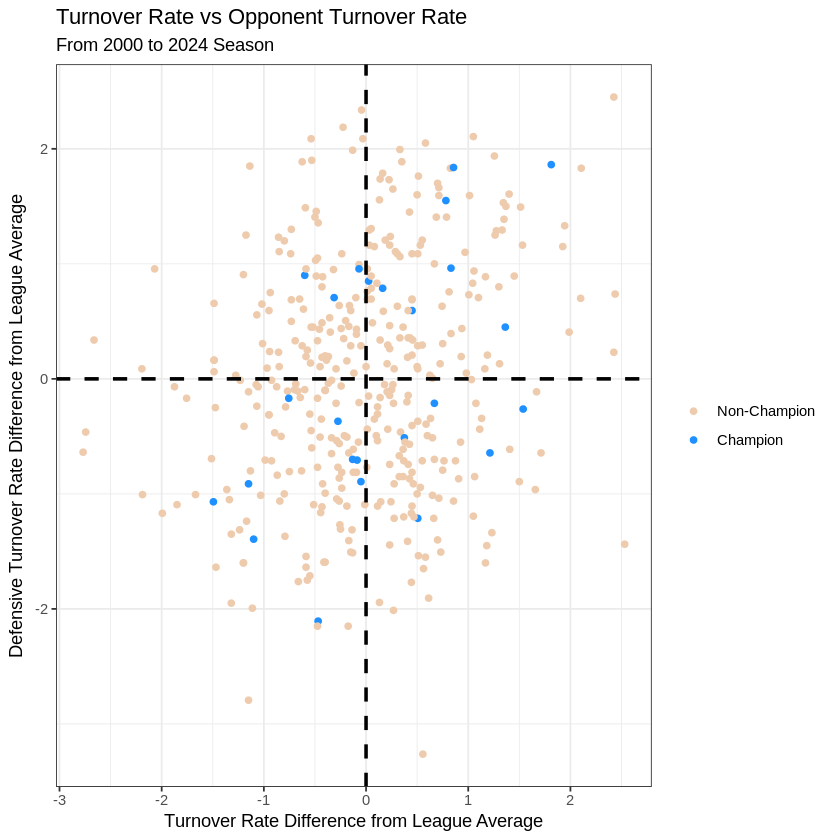

In [ ]:
Team_Stats_Comparison |>
  mutate(Champion = as.factor(Champion)) |>
  ggplot(aes(TOV_percent_diff_from_league_avg, Def_TOV_percent_diff_from_league_avg, color = Champion,)) +
    geom_point() +
    geom_hline(yintercept = 0, linetype = 'dashed', linewidth = 1) +
    geom_vline(xintercept = 0, linetype = 'dashed', linewidth = 1) +
    labs(
      title = "Turnover Rate vs Opponent Turnover Rate",
      subtitle = "From 2000 to 2024 Season",
      x = "Turnover Rate Difference from League Average",
      y = "Defensive Turnover Rate Difference from League Average"
    ) +
    scale_color_manual(values= c('0' = 'peachpuff2', '1' = 'dodgerblue'),
                      labels = c('0' = 'Non-Champion', '1' = 'Champion')) +
    theme_bw() +
    theme(legend.title = element_blank(),
          theme(plot.title = element_text(size = 15)))